In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
# 데이터 불러오기 (sklearn에서 제공되는 데이터셋 : 번치 객체 (딕셔너리처럼 활용)
breast_data = load_breast_cancer()

In [3]:
breast_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# X, y 분리
X = breast_data["data"]
y = breast_data["target"]

In [8]:
X.shape, y.shape

((569, 30), (569,))

In [10]:
pd.Series(y).value_counts()
# 1 : 양성
# 2 : 음성

1    357
0    212
Name: count, dtype: int64

In [11]:
# train, test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024, stratify=y)
# stratify = y -> 클래스 비율을 동일하게 유지하여 분할
# 데이터 편향성

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [13]:
display(pd.Series(y_train).value_counts())
display(pd.Series(y_test).value_counts())

1    250
0    148
Name: count, dtype: int64

1    107
0     64
Name: count, dtype: int64

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

### MLP (Multi Layer Perceptron, 다층 퍼셉트론)
```
- 단층 퍼셉트론 (입력과 출력으로만 이루어진 신경망)에서
차원 수를 확장(은닉층의 역할) 시켜,
비선형성이 가능케 한 여러개의 층으로 구성하여 만든 신경망
```

In [16]:
# 1. 신경망 구조 설계
# 뼈대 
model = Sequential()

# 입력층
model.add(InputLayer(shape=(30,)))

# 중간층(은닉층)
model.add(Dense(units=32, activation="sigmoid")) # 퍼셉트론(선형모델 + 활성화함수)
model.add(Dense(units=64, activation="sigmoid"))
model.add(Dense(units=128, activation="sigmoid"))
model.add(Dense(units=256, activation="sigmoid"))
model.add(Dense(units=128, activation="sigmoid"))
model.add(Dense(units=64, activation="sigmoid")) 
model.add(Dense(units=32, activation="sigmoid")) 
# 중간층에서의 활성함수의 역할 : 역치의 기준을 통해 다음 층으로 정보를 넘기는 활성화에 대한 여부

# 출력층
model.add(Dense(units=1, activation="sigmoid")) 
# 출력층에서의 activation 역할 : 어떠한 값을 출력할 것인지에 대한 함수 정의
# linear (회귀) : 기본값, 항등함수 (y = x), 선형 모델이 예측한 값을 그대로 출력
# sigmoid (이진분류) : 선형 모델이 예측한 값을 0 ~ 1 사이의 '확률값'으로 변경해서 출력
# softmax (다중분류, 클래스 개수만큼 유닛의 수 설정) : 클래스의 개수만큼 확률값을 반환하는데 '총합'이 1이 되도록 출력


In [17]:
# 2. 학습 방법 설정 - 출력 형태에 따라 다르게 설정
model.compile(loss="binary_crossentropy", # 오차 구해주는 도구
              optimizer = "adam", # 최적화 함수 (SGD는 local minima에 빠질 확률이 크다)
              metrics=["accuracy"]
              )
# loss 설정
# 회귀 : MSE (평균 제곱 오차), y값이 실수값인 경우 사용되는 손실함수(도구)
# 이진분류 : binary_crossentropy (교차 엔트로피), y값이 이진인 경우 사용되는 손실함수
# 다중분류 : categorical_crossentropy(범주형 교차 엔트로피), y값이 다중인데, y가 2D인경우 사용되는 손실함수
# 다중분류 : sparse_categorical_crossentropy, y값이 다중인데, y가 1D인경우 사용되는 손실함수

In [18]:
# 3. 학습
h = model.fit(
    X_train, y_train,
    validation_split=0.3,
    epochs=30,
)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6176 - loss: 0.6735 - val_accuracy: 0.6583 - val_loss: 0.6549
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6246 - loss: 0.6655 - val_accuracy: 0.6583 - val_loss: 0.6460
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6070 - loss: 0.6704 - val_accuracy: 0.6583 - val_loss: 0.6468
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6172 - loss: 0.6665 - val_accuracy: 0.6583 - val_loss: 0.6465
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6286 - loss: 0.6608 - val_accuracy: 0.6583 - val_loss: 0.6439
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6162 - loss: 0.6658 - val_accuracy: 0.6583 - val_loss: 0.6475
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5849 - loss: 0.6799 - val_accuracy: 0.6583 - val_loss: 0.6469
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6174 - loss: 0.6660 - val_accuracy: 0.6583 - val_loss: 0.6431


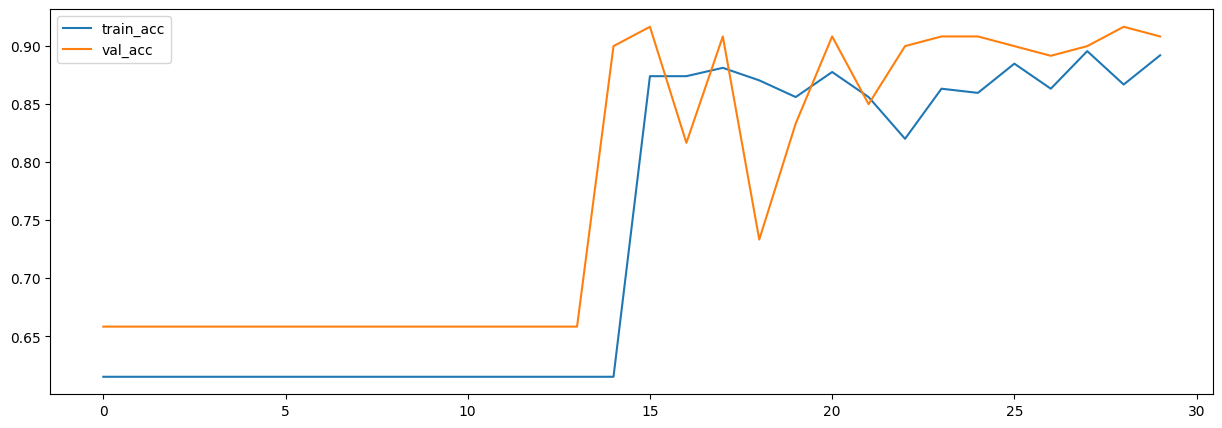

In [19]:
# 4. 평가
plt.figure(figsize=(15, 5))

plt.plot(h.history["accuracy"], label="train_acc")
plt.plot(h.history["val_accuracy"], label="val_acc")
plt.legend()
plt.show()

# 초기 epoch 때 local minima에 빠져있는 모습이 관측됨
# 그러나 adam으로 인해 빠져나와 전역 최소점을 찾아가는 모습도 관측됨